## Model Selection

Optimal Model Criteria:

Returning to Gauss-Markov assumptions we still need residuals with:
1) No autocorrelation
2) Homoscedastic variance
3) Approximately normal distribution.

Formal tests or graphical inspection of the residuals will give us an idea of whether these criteria are met.

A further consideration is for a parsimonious model. Simpler models are preferred as complex models capture white noise rather than the underlying pattern.

Formal tests for these criteria generally involve an auxillary regression. A second regression on the residuals.

3 main types of tests in Econometrics:

1) Lagrange Multiplier LM - test statistic is usually calculated as some function of R^2 the regression coefficient of determination from the unrestricted model.

2) Likelihood ratio - ratio of the value of likelihood function for the restricted unrestricted model

3) Wald - joint hypothesis test

Tests differ in power and size depending on the underlying DGP (data generating process)

**Size** - is the probability of rejecting the null hypothesis when it is in fact true - a type I error.

**Power** - is the probability of rejecting the null hypothesis when it is false, otherwise a type 2 error. For a test to be consistent this probability should tend towards 1.

For a test at a significance level of 5% of 10,000 iterations we expect 500 Type I errors.

## Residual Autocorrelation

The tests we use are the:
- Durbin Watson test
- Ljung-Box test
- Breusch-Godfrey test

Residual Autocorrelation means that we can predict residuals from past residuals a violation of OLS.

## Residual Heteroscedasticity

This means that the variance of residuals is not constant, we test residuals for heteroscedasticity using the White test.
If residuals increase with the value of the independent variable, it suggests the model might not be appropriately modeling the spread of the dependent variable.

## Autoregressive Conditional Heteroskedasticity

The presence of ARCH effect suggests some pattern in the conditional variance. A test for ARCH effects is the ENGLE test based on auxillary regression.
Conditional Heteroscedasticity by itself does not invalidate Gauss Markov Theorem as the regression can still be unconditionally homoscedastic.

In [8]:
# Performing a Breusch-Godfrey test for residual autocorrelation. We can predict residuals from past residuals

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

np.random.seed(7)

n = 100
x = np.random.rand(n)

epsilon = np.random.normal(0,1,n)

# Regression Model
 
y = 1 + 2*x + epsilon

# Giving the residuals autocorrelation

for t in range(2,n):
    epsilon[t] += 0.5*epsilon[t-1]
y += epsilon

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
print(model.summary())

bg_test = acorr_breusch_godfrey(model, nlags = 2)
print('=' * 55)
print("Breusch-Godfrey Test Results:")
print(f"LM Statistic: {bg_test[0]}")
print(f"p-value: {bg_test[1]}")
print(f"F-statistic: {bg_test[2]}")
print(f"F p-value: {bg_test[3]}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     9.307
Date:                Sun, 24 Nov 2024   Prob (F-statistic):            0.00294
Time:                        20:32:10   Log-Likelihood:                -207.75
No. Observations:                 100   AIC:                             419.5
Df Residuals:                      98   BIC:                             424.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8680      0.427      2.034      0.0

The p-value for the Breusch Godfrey test where the null hypothesis is no Autocorrelation. Indicates that we will see observations as extreme as the test statistic 0.1% of the time given the null is true. Which implies we have residual autocorrelation, which we know by construct.

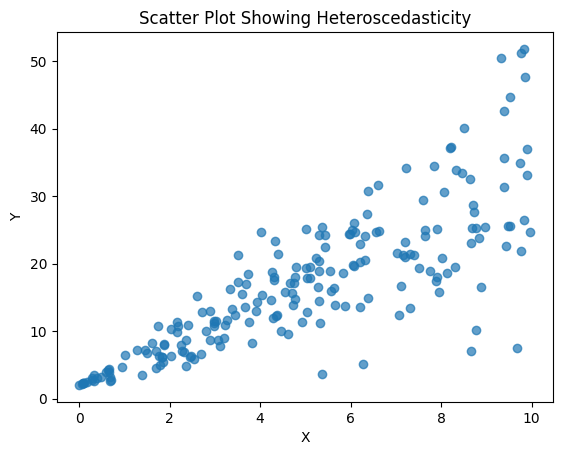

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     391.3
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           8.86e-49
Time:                        20:32:10   Log-Likelihood:                -644.14
No. Observations:                 200   AIC:                             1292.
Df Residuals:                     198   BIC:                             1299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9969      0.869      2.297      0.0

In [9]:
from statsmodels.stats.diagnostic import het_white
import matplotlib.pyplot as plt

# To prove the test works we need to construct a regression dataset where heteroscedasticity is present and residuals have changing variance

np.random.seed(8)

n = 200
X_het = np.random.rand(n) * 10

epsilon = np.random.normal(0,X_het)
Y_het = 2 + 3*X_het + epsilon

plt.scatter(X_het, Y_het, alpha=0.7)
plt.title("Scatter Plot Showing Heteroscedasticity")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

X_het = sm.add_constant(X_het)

model = sm.OLS(Y_het, X_het).fit()
print(model.summary())

white_test = het_white(model.resid, model.model.exog)

print("White Test Results:")
print(f"LM Statistic: {white_test[0]}")
print(f"LM Test p-value: {white_test[1]}")
print(f"F-statistic: {white_test[2]}")
print(f"F Test p-value: {white_test[3]}")

We see the p-values reject ehh null hypothesis that there is no residual heteroscedasticity.

## Model Selection

There might be a number of competing models which satisfy GM assumptions. So which is optimal?

Two model selection appraches:

1) **Iterative Methods** - Testing down to find significance of the final regressor. I.e t-test fo rlags.
    Testing down - Start with most general specification thought feasible, and jointly test significance of regressors until significance is found. We DO NOT test up as we run the risk of omitted variable bias.
2) **Model Selection Criteria** - Sample fit compared with model parsimony, AIC, SBIC , HQIC
    Model optimality is shown by the minimum value of the information criterion. I.e the value closest to - Infinity, as multiple values can be negative.

N.b we take the Schwarz Bayesian Information Criterion SBIC over the Akaiki Information Criterion AIC as there is a consideration for parsimony.


In [10]:
np.random.seed(42)
n = 200
phi = [0.75, -0.25]
p = len(phi)
epsilon = np.random.normal(0,1,n)

y = np.zeros(n)

for t in range(p, n):
    y[t] = phi[0] * y[t-1] + phi[1]*y[t-2] + epsilon[t]


from statsmodels.tsa.ar_model import AutoReg

y = pd.Series(y)

max_lags = 6
sbic_values = []
aic_values = []
for lag in range(1,max_lags + 1):
    model = AutoReg(y, lags = lag, old_names = False)
    fit = model.fit()

    bic = fit.bic
    sbic_values.append(bic)



for lag in range(1,max_lags + 1):
    model = AutoReg(y, lags = lag, old_names = False)
    fit = model.fit()

    aic = fit.aic
    aic_values.append(aic)

display = pd.DataFrame({"SBIC": sbic_values, "AIC": aic_values})
display.index = range(1, max_lags + 1)
display.index.name = "Lag"
display



,SBIC,AIC
Lag,,
1,565.779173,555.899258
2,554.137011,540.983943
3,557.012102,540.596083
4,557.531745,537.863057
5,556.236122,533.325125
6,559.234291,533.091426


As expected by construct, the SBIC suggests that the optimal lag length for the regression model of the data is 2, the AIC suggests that 6 - lags is optimal with the reason being that it does not penalise complexity of the model.